# HW9 (60 points total)

This homework requires the cities.db and winequality-red.csv files, found where you downloaded the homework.

# Problem 1: SQLite Queries (17 points: 4,6,7)

For each text description of a query, make the corresponding query in SQLite (in Python).  Be sure to upload the cities.db file first.  This file contains two tables, the cities table containing "name" (of city) and "population", and the "best_cities" table, containing "city" and "reason" (one reason it's a good city, according to the AFAR website).

In [1]:
from google.colab import files

uploaded = files.upload() # Choose cities.db file

Saving cities.db to cities.db


In [2]:
import sqlite3
connection = sqlite3.connect('cities.db')

In [4]:
# Make a cursor object

cursor = connection.cursor()

# Import pprint module to help us print data structures in a readable and way

from pprint import pprint


(a) (4 points) Query: all the best cities where the reason is "Nightlife."

In [8]:
# TODO

cursor.execute("SELECT * FROM best_cities WHERE reason = 'Nightlife'")
results = cursor.fetchall()
pprint(results)


[('London', 'Nightlife'),
 ('Barcelona', 'Nightlife'),
 ('Madrid', 'Nightlife'),
 ('Berlin', 'Nightlife')]


(b) (6 points) Query:  All the cities in the cities table that end in '-ton,' and their populations.




In [9]:
# TODO

cursor.execute("SELECT * FROM cities WHERE name LIKE '%ton'")
results = cursor.fetchall()
pprint(results)


[('Arlington', '332969'),
 ('Arlington', '174838'),
 ('Boston', '589141'),
 ('Brockton', '93653'),
 ('Carrollton', '109576'),
 ('Charleston', '89063'),
 ('Compton', '92864'),
 ('Dayton', '166179'),
 ('Fullerton', '126003'),
 ('Hampton', '146437'),
 ('Houston', '1953631'),
 ('Stockton', '243771'),
 ('Washington', '572059')]


(c) (7 points) Query:  city name, reason it's a good city, and population, from an inner join of the two tables.  (This should produce 5 American cities.)

In [10]:
# TODO

cursor.execute("SELECT best_cities.city, best_cities.reason, cities.name, cities.population FROM best_cities INNER JOIN cities ON best_cities.city = cities.name")
results = cursor.fetchall()
pprint(results)


[('Los Angeles', 'University', 'Los Angeles', '3694820'),
 ('Chicago', 'Culture', 'Chicago', '2896016'),
 ('San Francisco', 'Things to do', 'San Francisco', '776733'),
 ('Las Vegas', 'Attractions', 'Las Vegas', '478434'),
 ('Washington', 'Attractions', 'Washington', '572059')]


# Problem 2:  Advanced Pandas (25 points, 7, 6, 6, 6)

Perform the requested transformations of the table below.


In [ ]:
import pandas as pd
import numpy as np

movies = pd.DataFrame({"Title": ["Perfect Blue",
                                 "Three Colours: Red",
                                 "Three Colours: Blue",
                                 "Three Colours: White",
                                 "Harold and Kumar Go to White Castle",
                                 "Men in Black",
                                 "Yellow Submarine"],
                       "Genre": ["Thriller","Drama","Drama","Drama","Comedy","Fantasy","Fantasy"],
                       "Year": [1997,1994,1994,1994,2004,1997,1968],
                       "Country": ["Japan","France","France","France","USA","USA","UK"],
                       "RTScore": [80, 100, 98, 87, 74, 92, 95]})
                       

(a) (7 points) Use pivot_table to create a table from the movies data where the rows are genres, the columns are countries, and the numerical values are average Rotten Tomatoes scores ("RTScore").

In [ ]:
# TODO

movies.pivot_table(index="Genre", columns="Country", values="RTScore", aggfunc=np.mean)

Country,France,Japan,UK,USA
Genre,,,,
Comedy,NaN,NaN,NaN,74.0
Drama,95.0,NaN,NaN,NaN
Fantasy,NaN,NaN,95.0,92.0
Thriller,NaN,80.0,NaN,NaN


(b) (6 points) Use groupby to find the mean score by genre.  Don't include averages of the year (use just the Genre and RTScore columns).

In [ ]:
# TODO

movies.groupby("Genre")["RTScore"].mean()

Genre
Comedy      74.0
Drama       95.0
Fantasy     93.5
Thriller    80.0
Name: RTScore, dtype: float64

(c) (6 points) Perform an outer join with the following table on movie title.

In [ ]:
animated = pd.DataFrame({"Title": ["Perfect Blue",
                                 "Harold and Kumar Go to White Castle",
                                 "Men in Black",
                                 "Yellow Submarine",
                                 "Revolutionary Girl Utena",
                                 "End of Evangelion",
                                 "No"],
                         "Animated": [True,False,False,True,True,True,False]})

In [ ]:
# TODO

pd.merge(movies, animated, on = "Title", how = "outer")

,Title,Genre,Year,Country,RTScore,Animated
0,Perfect Blue,Thriller,1997.0,Japan,80.0,True
1,Three Colours: Red,Drama,1994.0,France,100.0,NaN
2,Three Colours: Blue,Drama,1994.0,France,98.0,NaN
3,Three Colours: White,Drama,1994.0,France,87.0,NaN
4,Harold and Kumar Go to White Castle,Comedy,2004.0,USA,74.0,False
5,Men in Black,Fantasy,1997.0,USA,92.0,False
6,Yellow Submarine,Fantasy,1968.0,UK,95.0,True
7,Revolutionary Girl Utena,NaN,NaN,NaN,NaN,True
8,End of Evangelion,NaN,NaN,NaN,NaN,True
9,No,NaN,NaN,NaN,NaN,False


(d) (6 points) Create a pivot table from the first movies table where the rows are genres and the columns are min, mean, and max RTScore. (The columns can have any order.)


In [ ]:
# TODO

movies.pivot_table(index = "Genre", values = "RTScore", aggfunc = [np.min, np.mean, np.max])

,amin,mean,amax
,RTScore,RTScore,RTScore
Genre,,,
Comedy,74,74.0,74
Drama,87,95.0,100
Fantasy,92,93.5,95
Thriller,80,80.0,80


# Problem 3:  Seaborn (8 points)

Download the winequality-red.csv file and upload it to Google colab.  Then, draw a 4-dimensional scatterplot of the data using the following features (which were the most important in predicting quality according to our random forests homework):  alcohol for the x-axis, quality for the y-axis, volatile acidity for the hue, and sulphates for the size.  Set the sizes parameter to (10,400) to make those more visible.  You don't need to change the colormap or other defaults not mentioned here.

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving winequality-red.csv to winequality-red.csv


In [ ]:
import pandas as pd

wine = pd.read_csv('winequality-red.csv', sep = ';')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


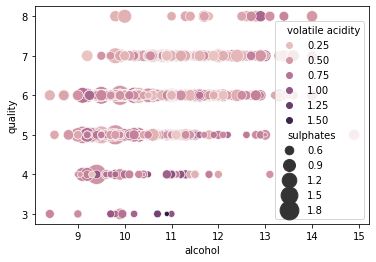

In [ ]:
# TODO

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x="alcohol", y="quality", hue="volatile acidity", size="sulphates", sizes=(10,400), data=wine)
plt.show()

# Problem 4: Complexity (10 points: 4,4,2)

a, 4 pts) Find the big-$\Theta$ asymptotic complexity of the following function in terms of N, its input.  Don't include constants and lower-order terms.

In [ ]:
import numpy as np

def create_matrix(N):
  my_matrix = np.zeros((N,N)) # Hint: every item in the zeros matrix must be set to zero
  for i in range(0,N-2):
    for j in range(0,N):
      my_matrix[i][j] = 2
  return my_matrix

# Example
  create_matrix(5)

**TODO**

 The big-O asymptotic complexity for the function is O(N^2).

b, 4 pts) Find the big-$\Theta$ worst case running time in terms of the number of strings $N$ in the input list.  Assume string comparisons and append() take constant time.  Hint:  The number of times append() is called is $N(N-1)(N-2)$.

In [ ]:
def all_triples(string_list):
  triple_list = []
  for a in string_list:
    for b in string_list:
      if b != a:
        for c in string_list:
          if c != a and c != b:
            triple_list.append((a,b,c)) # Assume append is constant time
  return triple_list

# Example
all_triples(['Alice','Bob','Kai','Yulin'])


[('Alice', 'Bob', 'Kai'),
 ('Alice', 'Bob', 'Yulin'),
 ('Alice', 'Kai', 'Bob'),
 ('Alice', 'Kai', 'Yulin'),
 ('Alice', 'Yulin', 'Bob'),
 ('Alice', 'Yulin', 'Kai'),
 ('Bob', 'Alice', 'Kai'),
 ('Bob', 'Alice', 'Yulin'),
 ('Bob', 'Kai', 'Alice'),
 ('Bob', 'Kai', 'Yulin'),
 ('Bob', 'Yulin', 'Alice'),
 ('Bob', 'Yulin', 'Kai'),
 ('Kai', 'Alice', 'Bob'),
 ('Kai', 'Alice', 'Yulin'),
 ('Kai', 'Bob', 'Alice'),
 ('Kai', 'Bob', 'Yulin'),
 ('Kai', 'Yulin', 'Alice'),
 ('Kai', 'Yulin', 'Bob'),
 ('Yulin', 'Alice', 'Bob'),
 ('Yulin', 'Alice', 'Kai'),
 ('Yulin', 'Bob', 'Alice'),
 ('Yulin', 'Bob', 'Kai'),
 ('Yulin', 'Kai', 'Alice'),
 ('Yulin', 'Kai', 'Bob')]

**TODO**

The big-O asymptotic complexity for the function is O(N^3).

3, 2 pts) Of the two asymptotic running times you listed (which should be different), which is the more desirable running time?

**TODO**

create_matrix is more desirable because it is O(N^2) and all_triples is O(N^3). The reason is that the running time of create_matrix is linear in the size of the input, N. And the running time of all_triples is quadratic in the size of the input, N.